In [27]:
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import sklearn
# ^^^ pyforest auto-imports - don't write above this line
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('USA_cars_datasets.csv', index_col=0)

|Feature	|Type |Description|
|--------|---------|--------------|
|Price|	Integer|	The sale price of the vehicle in the ad
|Years	|Integer	|The vehicle registration year
Brand	|String	|The brand of car
Model	|String	|model of the vehicle
Color	|String	|Color of the vehicle
State/City	|String	|The location in which the car is being available for purchase
Mileage	|Float	|miles traveled by vehicle
Vin	|String	|The vehicle identification number is a collection of 17 characters (digits and capital letters)
Title |Status	|String	This feature included binary classification, which are clean title vehicles and salvage insurance
Lot	|Integer	|A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.
Condition	|String	|Time

[Data description link](https://www.kaggle.com/doaaalsenani/usa-cers-dataset)

In [3]:
data.shape

(2499, 12)

In [4]:
for col in data.columns:
    print(col)
    print()
    print(data[col].value_counts())
    print('= - ='*20)
    print()

price

0        43
16500    26
13900    21
15000    19
15500    19
         ..
35700     1
24005     1
5580      1
19925     1
4080      1
Name: price, Length: 790, dtype: int64
= - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - == - =

brand

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
buick                13
kia                  13
honda                12
infiniti             12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
audi                  4
peterbilt             4
acura                 3
lexus                 2
mazda                 2
lincoln               2
ram                   1
maserati              1
toyota                1
jaguar                1
harley-davidson       1
Name: brand, dtype: int64
= - == - == - =

### Process

In [5]:
data.head(1)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left


In [6]:
data.drop(columns=['vin', 'lot'], inplace= True)

In [7]:
data.rename(columns={'mileage' : 'miles_driven'}, inplace = True)

In [8]:
data['title_status'].replace({'clean vehicle' : 1, 'salvage insurance': 0}, inplace = True)

In [9]:
data['vehicle_age'] = 2020 - data['year']
data.drop(columns=['year'], inplace= True)

In [10]:
# converting day,hours into minutes

data['condition'] = data['condition'].str.replace('left','')
data.loc[data['condition'].str.contains('minutes'), 'condition'] = data.loc[data['condition'].str.contains('minutes'), 'condition'].apply(lambda x : str(x).split()[0])
data.loc[data['condition'].str.contains('hours'), 'condition'] = data.loc[data['condition'].str.contains('hours'), 'condition'].apply(lambda x : str(int(str(x).split()[0])*60))
data.loc[data['condition'].str.contains('days'), 'condition'] = data.loc[data['condition'].str.contains('days'), 'condition'].apply(lambda x : str(int(str(x).split()[0])*60*24))
data.loc[data['condition'].str.contains('Listing Expired'), 'condition'] = 0
data['condition'] = data['condition'].astype('int')

In [11]:
data[data.country == ' canada']

,price,brand,model,title_status,miles_driven,color,state,country,condition,vehicle_age
261,33000,chevrolet,1500,1,52521.0,white,ontario,canada,14400,2
813,30000,dodge,charger,1,43294.0,white,ontario,canada,14400,1
814,30000,dodge,charger,1,54309.0,orange,ontario,canada,14400,1
815,30000,dodge,charger,1,52822.0,white,ontario,canada,14400,1
816,30000,dodge,charger,1,45554.0,white,ontario,canada,14400,1
817,30000,dodge,charger,1,37538.0,white,ontario,canada,14400,1
818,29500,dodge,charger,1,35153.0,red,ontario,canada,14400,1


##### As Canada has only 7 values and 5 out of 7 have same price(30,000) even they has +/- 10,000 difference in miles_driven and most of the other attributes are equal. So ***Removing column Country***.      We have ***state*** column so i think that makes sense.

In [12]:
data.drop(columns='country',inplace = True)

In [13]:
# Replacing colors having counts less than 10 to other

colors_less_counts = data.color.value_counts()[data['color'].value_counts() < 10].index
data['color'].replace(colors_less_counts, 'other', inplace= True)

In [14]:
pd.set_option('display.max_rows',200)

In [15]:
data.groupby('model')['brand'].value_counts()

model        brand          
1500         chevrolet           38
             gmc                  1
2500         chevrolet            8
2500hd       gmc                  1
300          chrysler             6
3500         chevrolet            4
5            audi                 1
acadia       gmc                  1
altima       nissan              21
armada       nissan               4
bus          ford                 2
cab          ford                 5
             chevrolet            1
             gmc                  1
             nissan               1
camaro       chevrolet            6
caravan      dodge              102
cargo        ford                 1
             nissan               1
challenger   dodge               44
charger      dodge               42
chassis      ford                 4
cherokee     jeep                 3
colorado     chevrolet           12
compass      jeep                 6
connect      ford                 1
convertible  ford                 1

In [16]:
data['model'].replace(['doors','d'], 'door', inplace = True)

#### We Have cars whose price are zero and less than 100 also. 

In [17]:
data['price'].value_counts().sort_index().head(10)

0      43
25     18
50      2
75      3
100     1
125     1
175     1
200     1
225     1
250     1
Name: price, dtype: int64

In [18]:
data[(data['price'] == 0) | (data['price'] == 25)]

,price,brand,model,title_status,miles_driven,color,state,condition,vehicle_age
141,0,dodge,van,0,177948.0,orange,utah,2880,12
144,0,dodge,door,0,123660.0,silver,utah,2880,6
196,0,ford,mpv,1,76858.0,white,texas,2880,3
206,25,chevrolet,vehicl,0,7232.0,black,kentucky,4320,0
209,25,chrysler,door,0,151815.0,silver,massachusetts,4320,15
284,25,dodge,door,0,160528.0,other,minnesota,1020,13
285,0,ford,door,0,124969.0,black,oklahoma,1020,20
290,0,mazda,door,0,117541.0,gray,indiana,960,11
293,0,chevrolet,pickup,0,258631.0,gray,texas,1020,22
297,0,honda,door,0,152608.0,white,arkansas,1020,17


##### From above table we can say that most of the cars title_status = 0(Salvage_insurace). So not changing price

##### We can also find some anomalies such as indexes 309,322,349,545 whose prices = 0 and miles driven = 0 and age > 10

In [19]:
data.drop(index=[309,322,349,545], inplace = True)

In [20]:
data.isnull().sum()

price           0
brand           0
model           0
title_status    0
miles_driven    0
color           0
state           0
condition       0
vehicle_age     0
dtype: int64

In [21]:
data_copy = data.copy(deep = True)

In [22]:
num_cols = data_copy.select_dtypes(exclude='object').columns
cat_cols = data_copy.select_dtypes(include='object').columns

#### OutLier detection

[Isolation forest paper](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf)

In [23]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state = 1)
preds = clf.fit_predict(data_copy[num_cols])  # using only numerical columns
list(preds).count(-1)

386

##### Using numerical columns only we can find 386 outliers.  -1 is an outlier and 1 is not an outlier

In [24]:
from scipy.stats import zscore

In [25]:
data_copy_scaled = zscore(pd.get_dummies(data_copy))

In [26]:
clf = IsolationForest(random_state = 1)
preds = clf.fit_predict(data_copy_scaled) # using total data
list(preds).count(-1)

0

#### EDA

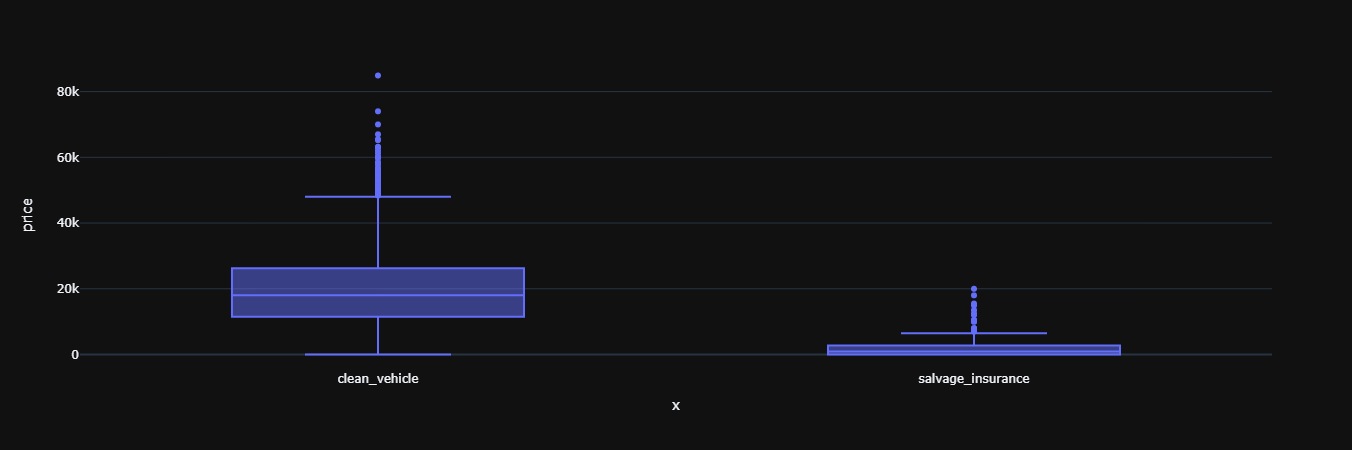

In [89]:
fig = px.box(data,x =  data['title_status'].replace({0:'salvage_insurance',1:'clean_vehicle'}), y ='price', template='plotly_dark')
fig.show()

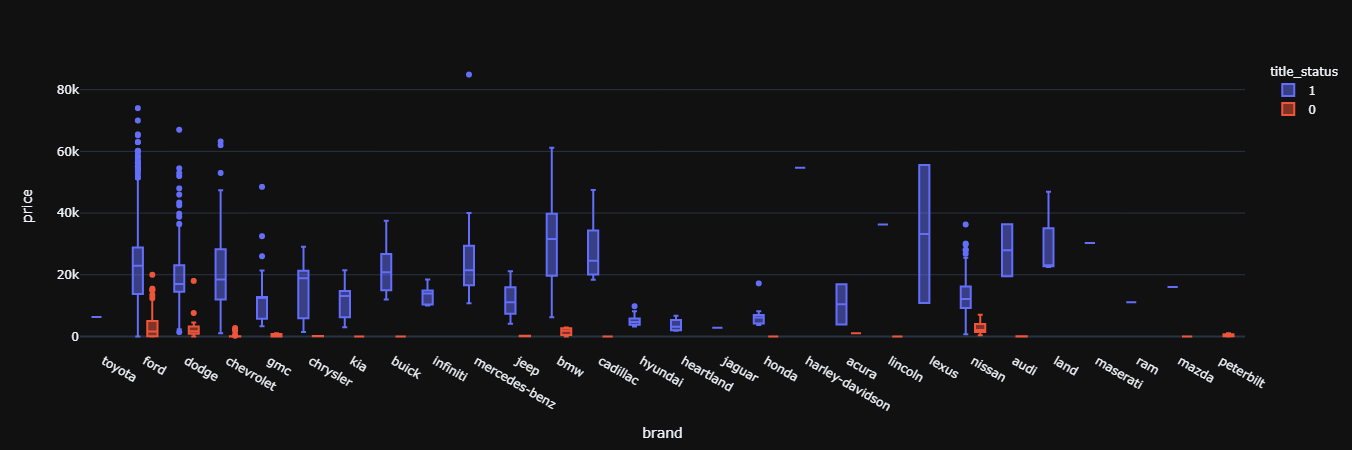

In [87]:
fig = px.box(data, x = 'brand', y ='price', template='plotly_dark' ,color = 'title_status')
fig.show()

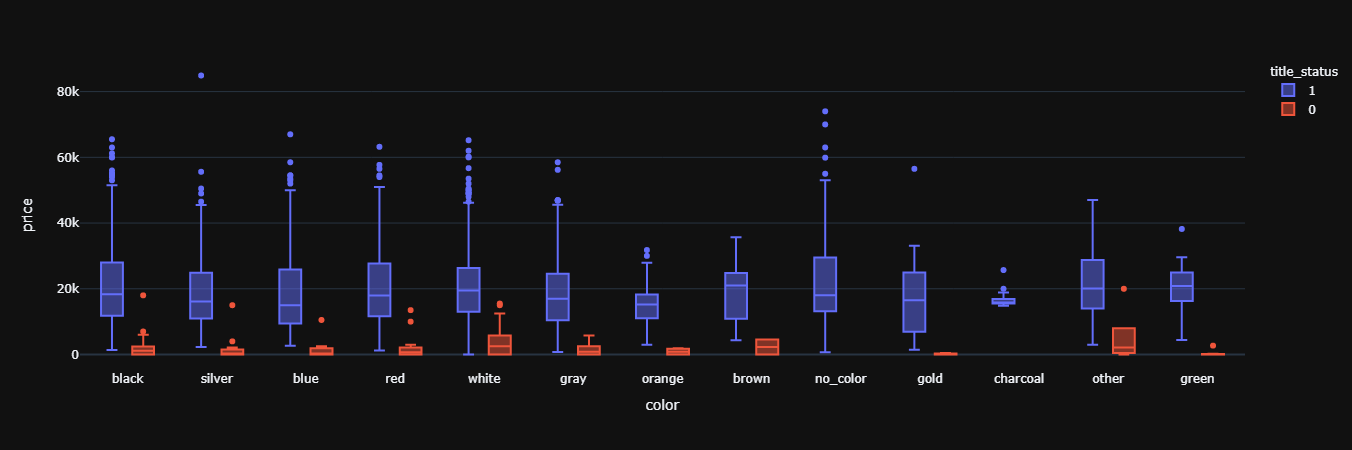

In [86]:
fig = px.box(data, x = 'color', y ='price', template='plotly_dark' ,color = 'title_status')
fig.show()

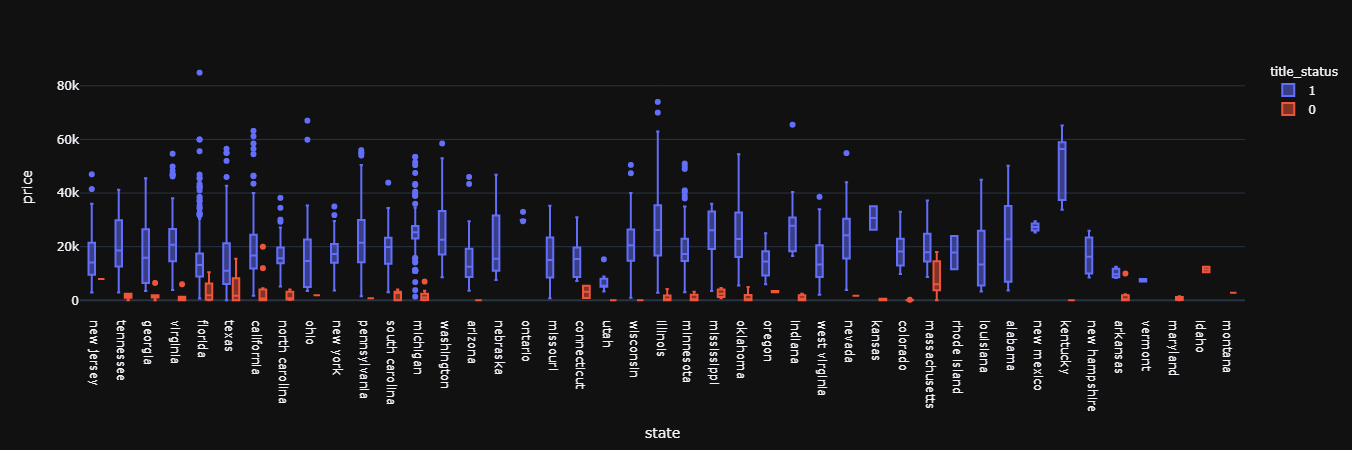

In [85]:
fig = px.box(data, x = 'state', y ='price', template='plotly_dark')
fig.show()

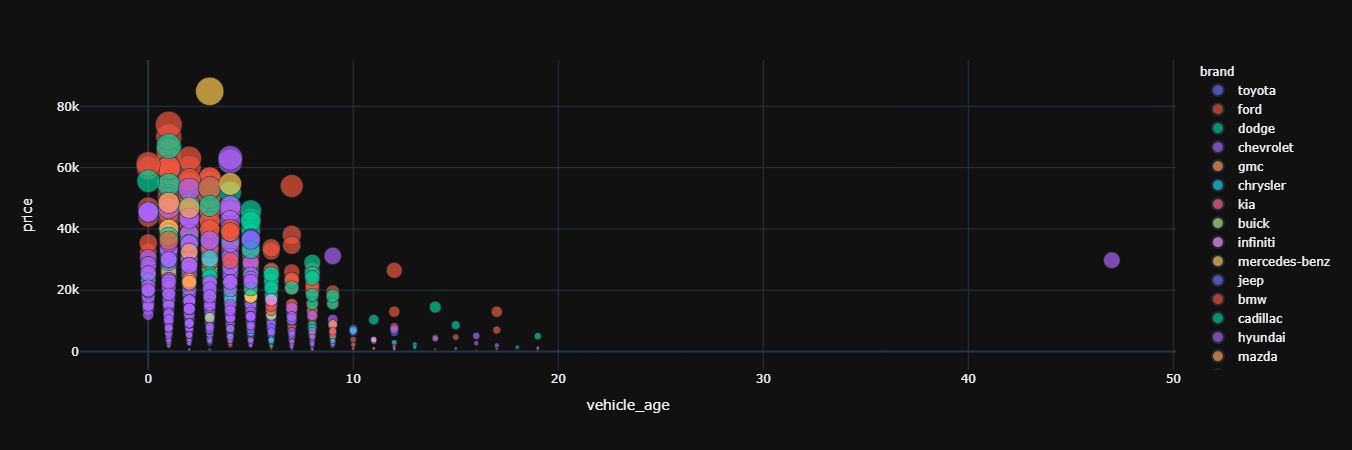

In [50]:
fig = px.scatter(data, x="vehicle_age", y="price", color="brand", size='price',hover_data=['model'], template = 'plotly_dark')
fig.show()

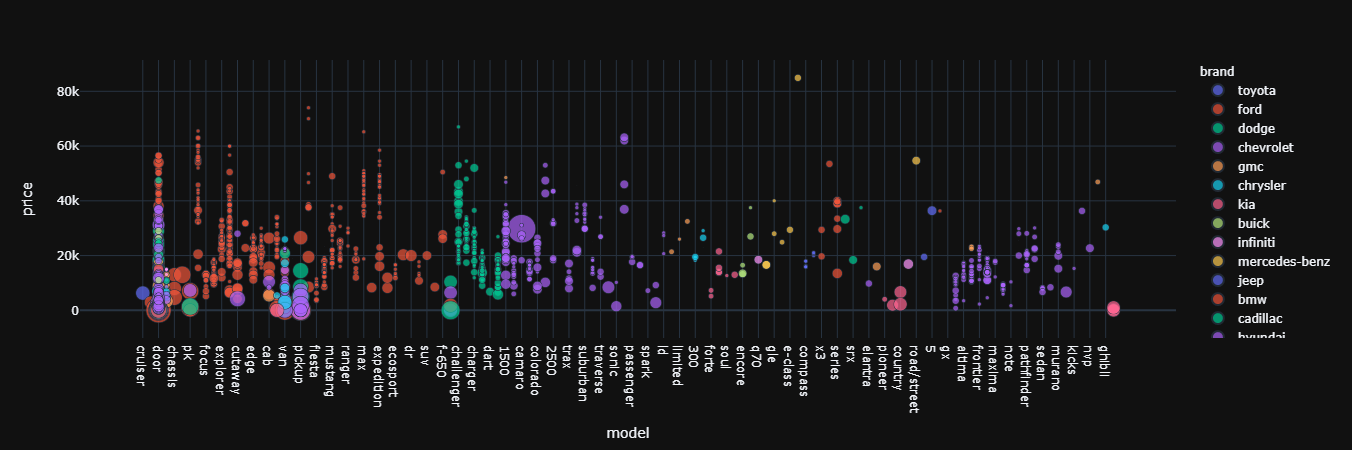

In [81]:
# Double click on brand to select one brand at a time to get good understanding
# In this graph we can observe price variation of different models in a brand.

fig = px.scatter(data, x="model", y="price", color="brand", size='vehicle_age',hover_data=['vehicle_age'], template = 'plotly_dark')
# fig.update_traces(visible= False, selector=dict(type='scatter'))
fig.show()

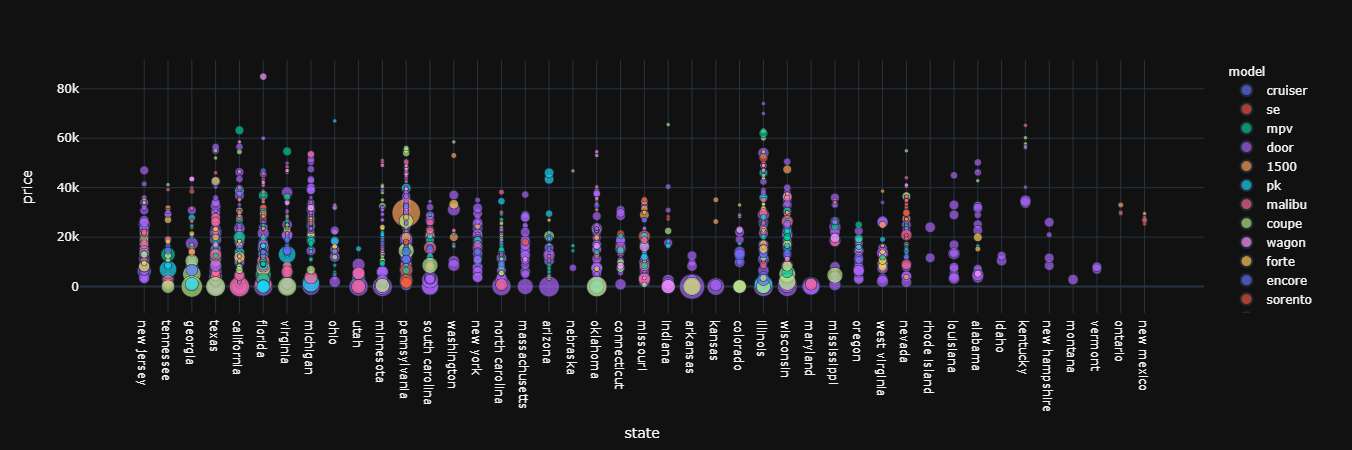

In [80]:
# Double click on model to select one brand at a time to get good understanding
# In this plot we can observe price variation of each model in different states

fig = px.scatter(data, x="state", y="price", color="model", size='vehicle_age',hover_data=['brand','vehicle_age','miles_driven'], template = 'plotly_dark')
fig.show()

In [90]:
def check_mutlicolinearity(data_x):
    corr = data_x.corr()
    corr = pd.DataFrame(np.tril(corr, k=-1),      # gets Lower triangular matrix
                        columns=data_x.columns,
                        index=data_x.columns)  

    corr = corr.replace(0.000000, np.NAN)
    count_of_total_correlation_values = corr.count().sum()

    for i in [0.5, 0.6, 0.7, 0.8, 0.9]:
        data_corr = corr[abs(corr) > i]
        count_greater_than_thresh = data_corr.count().sum()
        print(f'Percent Values Greater than {i} co-relation : {count_greater_than_thresh/count_of_total_correlation_values}')
    return corr

In [95]:
def plot_corr(threshold, corr):
    data_corr = corr[abs(corr) > threshold]
    sns.heatmap(data_corr, annot=True, cmap="YlGnBu", center=0)
    plt.show()

In [163]:
# data_x = dat
# data_target = data['class']

corr = check_mutlicolinearity(data[num_cols].drop(columns = 'price'))
# corr = check_mutlicolinearity(pd.DataFrame(X_scaled))

Percent Values Greater than 0.5 co-relation : 0.3333333333333333
Percent Values Greater than 0.6 co-relation : 0.16666666666666666
Percent Values Greater than 0.7 co-relation : 0.0
Percent Values Greater than 0.8 co-relation : 0.0
Percent Values Greater than 0.9 co-relation : 0.0


<IPython.core.display.Javascript object>

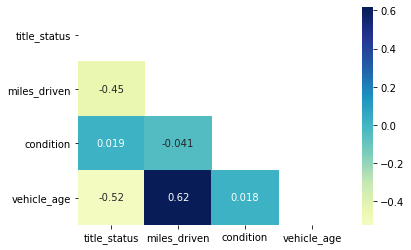

In [99]:
plot_corr(0, corr)

In [137]:
X = data.drop(columns='price')
X_scaled = zscore(pd.get_dummies(X))

Y = data['price']
Y_scaled = zscore(Y)

#### Feature Selection

In [121]:
data.corr()['price']

price           1.000000
title_status    0.355247
miles_driven   -0.404041
condition       0.001512
vehicle_age    -0.416246
Name: price, dtype: float64

In [118]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression,f_regression,f_oneway

In [126]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(pd.get_dummies(X[cat_cols]), Y)

SelectKBest(k='all', score_func=<function f_regression at 0x0000020AA701A3A8>)

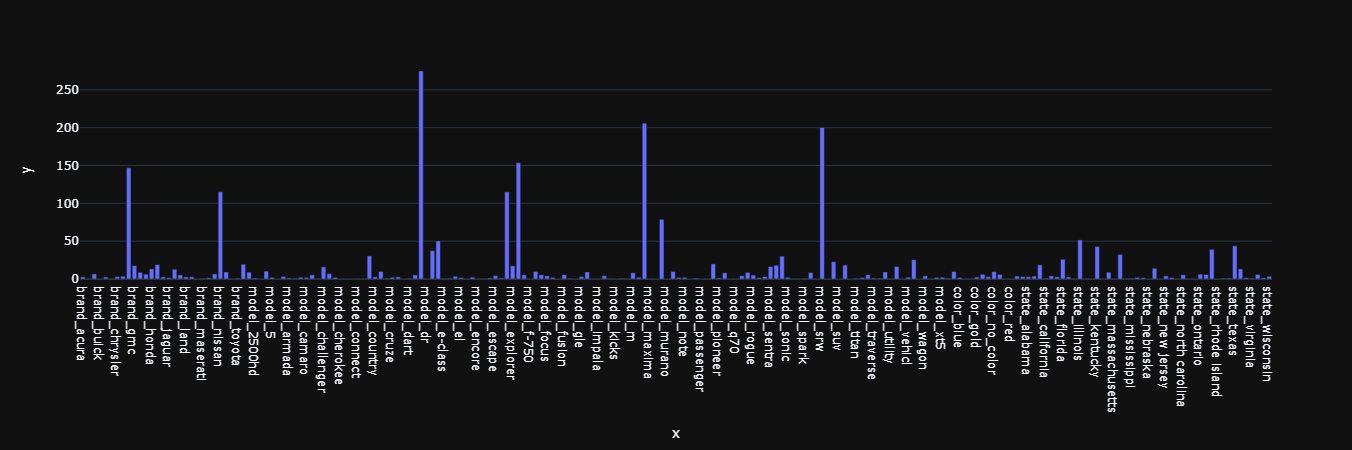

In [127]:
fig = px.bar(x =pd.get_dummies(X[cat_cols]).columns, y = fs.scores_, template = 'plotly_dark')
fig.show()

In [128]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(pd.get_dummies(X), Y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x0000020AA70244C8>)

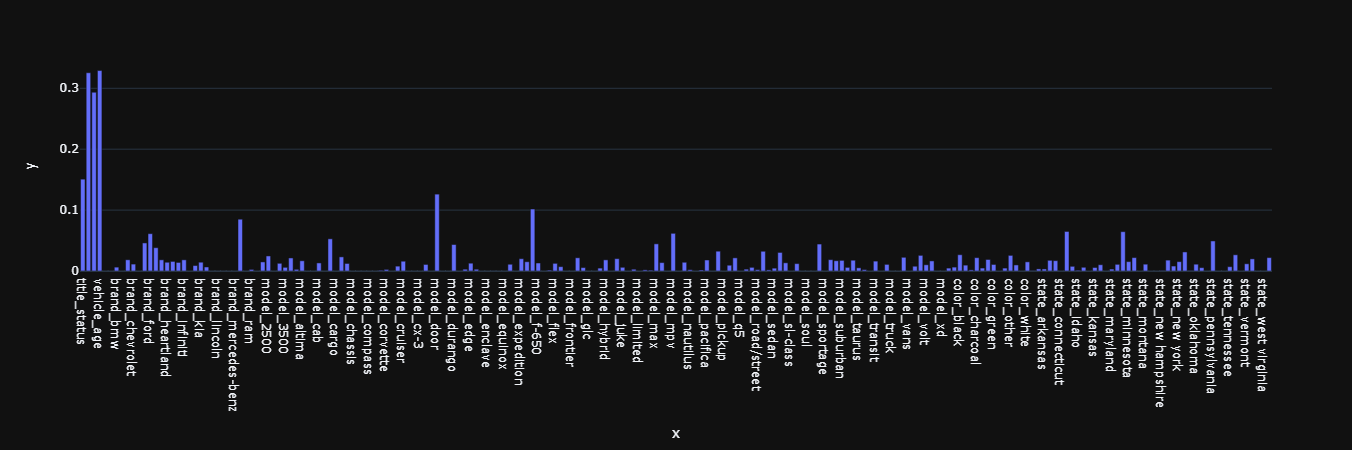

In [130]:
fig = px.bar(x = pd.get_dummies(X).columns, y =fs.scores_, template = 'plotly_dark')
fig.show()

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold


In [155]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [156]:
X_new_c=sm.add_constant(X_scaled)

In [159]:
model2=sm.OLS(Y_scaled,X_new_c).fit()

In [160]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     31.66
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:22:50   Log-Likelihood:                -1873.2
No. Observations:                2495   AIC:                             4154.
Df Residuals:                    2291   BIC:                             5342.
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.272e-16      0.011  -2.12e-14      1.000      -0.021       0.021
x1             0.1472      0.014     10.163      0.000       0.119       0.176
x2            -0.1949      0.018    -11.001      0.000      -0.230      -0.160
x3             0.0424      0.015      2.888      0.004       0.014       0.071
x4            -0.1382      0.019     -7.176      0.000      -0.176      -0.100
x5            -0.0032      0.013     -0.245      0.807      -0.029       0.023
x6             0.0096      0.015      0.624      0.533      -0.020       0.040
x7             0.0168      0.018      0.911      0.363      -0.019       0.053
x8             0.0126      0.014      0.913      0.361      -0.015       0.040
x9             0.0393      0.013      2.978      0.003       0.013       0.065
x10            0.0493      0.015      3.248      0.001       0.020       0.079
x11           -0.0178      0.016     -1.151      0.250      -0.048       0.013
x12           -0.0500      0.016     -3.029      0.002      -0.082      -0.018
x13            0.1260      0.012     10.239      0.000       0.102       0.150
x14           -0.0137      0.013     -1.092      0.275      -0.038       0.011
x15            0.0270      0.005      4.999      0.000       0.016       0.038
x16           -0.0251      0.005     -4.596      0.000      -0.036      -0.014
x17           -0.0277      0.011     -2.491      0.013      -0.050      -0.006
x18           -0.0590      0.012     -4.921      0.000      -0.083      -0.036
x19            0.0275      0.012      2.243      0.025       0.003       0.052
x20           -0.0231      0.011     -2.144      0.032      -0.044      -0.002
x21           -0.0267      0.015     -1.831      0.067      -0.055       0.002
x22           -0.0466      0.020     -2.367      0.018      -0.085      -0.008
x23            0.0120      0.013      0.904      0.366      -0.014       0.038
x24            0.0052      0.015      0.336      0.737      -0.025       0.035
x25           -0.0102      0.016     -0.654      0.513      -0.041       0.020
x26            0.0094      0.005      1.759      0.079      -0.001       0.020
x27           -0.0138      0.016     -0.867      0.386      -0.045       0.017
x28            0.0121      0.020      0.618      0.537      -0.026       0.050
x29           -0.1573      0.020     -8.054      0.000      -0.196      -0.119
x30            0.0297      0.007      4.496      0.000       0.017       0.043
x31           -0.0045      0.011     -0.419      0.675      -0.026       0.017
x32           -0.0001      0.005     -0.022      0.982      -0.011       0.011
x33            0.0606      0.012      4.955      0.000       0.037       0.085
x34            0.0609      0.011      5.422      0.000       0.039       0.083
x35            0.0220      0.011      2.009      0.045       0.001       0.043
x3

In [167]:
# GB_bias=[]
# GB_ve=[]
# for n in np.arange(1,100):
#     GB=GradientBoostingRegressor(n_estimators=n,random_state=0)
#     scores=cross_val_score(GB,X_scaled,Y_scaled,cv=3,scoring='neg_mean_squared_error')
#     rmse=np.sqrt(np.abs(scores))
#     GB_bias.append(np.mean(rmse))
#     GB_ve.append((np.std(rmse,ddof=1)))


<IPython.core.display.Javascript object>

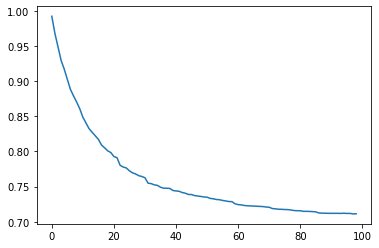

In [168]:
# x_axis=np.arange(len(GB_bias))
# plt.plot(x_axis,GB_bias)

In [169]:
# np.argmin(GB_bias)

97

In [197]:
# bias=[]
# ve=[]
# for n in np.arange(1,100):
#     mod=AdaBoostRegressor(base_estimator=LR,n_estimators=n,random_state=0)
#     scores=cross_val_score(mod,X_scaled,Y_scaled,cv=3,scoring='neg_mean_squared_error')
#     rmse=np.sqrt(np.abs(scores))
#     bias.append(np.mean(rmse))
#     ve.append((np.std(rmse,ddof=1)))


<IPython.core.display.Javascript object>

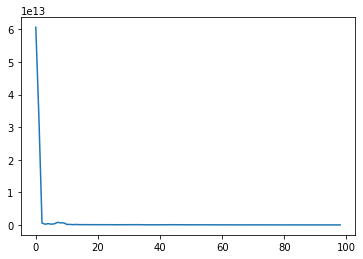

In [198]:
# x_axis=np.arange(len(bias))
# plt.plot(x_axis,bias)

In [199]:
# np.argmin(GB_bias)

94

In [200]:
LR=LinearRegression()
LR_AB=AdaBoostRegressor(base_estimator=LR,n_estimators = 94 ,random_state=0)
DT_AB=AdaBoostRegressor(n_estimators = 8 ,random_state=0)
LR_GB=GradientBoostingRegressor(n_estimators = 97, random_state=0)
RF=RandomForestRegressor(criterion='mse',random_state=0)

In [201]:
models = []
models.append(('LinearRegression', LR))
models.append(('Adaboost',LR_AB))
models.append(('DT_boost',DT_AB))
models.append(('GBoost',LR_GB))
models.append(('RF',RF))



In [209]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = cross_val_score(model, X_scaled, Y_scaled,cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
    
#     break
# boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

LinearRegression: 82882165693391.718750 (16946403394696.978516)
Adaboost: 240772818.011529 (93554119.101939)
DT_boost: 0.818966 (0.034922)
GBoost: 0.605851 (0.055805)
RF: 0.561966 (0.064892)


In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_scaled, random_state = 0)

In [223]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [224]:
y_predict = model.predict(x_train) # train error
mean_squared_error(y_train, y_predict)

0.3020304922275335

In [225]:
y_predict = model.predict(x_test) # test error
mean_squared_error(y_test, y_predict)

2.1301615317607043e+27

In [226]:
model = AdaBoostRegressor(n_estimators = 8 ,random_state=0)
model.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=8, random_state=0)

In [217]:
from sklearn.metrics import mean_squared_error

In [227]:
y_predict = model.predict(x_train) #train error
mean_squared_error(y_train, y_predict)

0.6725300696874059

In [228]:
y_predict = model.predict(x_test)  # test error
mean_squared_error(y_test, y_predict)

0.6062497481974455